In [1]:
results_name = 'ApplesOptions'

In [2]:
import sys; sys.path.append('../..')

from src.results import read_results
from src.risk import simulate_account
import datetime
import matplotlib as mpl
import pandas as pd

mpl.rcParams['figure.dpi'] = 100

orders = list(read_results.get_orders(results_name))
simulation = simulate_account.Simulation.from_orders(orders, simulate_account.IdealAccountState.empty(simulate_account.build_td_simulation()))

# Quantstats Portfolio

                           Strategy
-------------------------  ----------
Start Period               2022-01-02
End Period                 2022-07-18
Risk-Free Rate             2.0%
Time in Market             96.0%

Cumulative Return          152.53%
CAGR﹪                     456.4%

Sharpe                     1.97
Smart Sharpe               1.66
Sortino                    3.87
Smart Sortino              3.27
Sortino/√2                 2.74
Smart Sortino/√2           2.31
Omega                      1.43

Max Drawdown               -35.58%
Longest DD Days            79
Volatility (ann.)          113.0%
Calmar                     12.83
Skew                       1.56
Kurtosis                   5.11

Expected Daily %           0.65%
Expected Monthly %         14.15%
Expected Yearly %          152.53%
Kelly Criterion            14.28%
Risk of Ruin               0.0%
Daily Value-at-Risk        -10.82%
Expected Shortfall (cVaR)  -10.82%

Gain/Pain Ratio            0.43
Gain/Pain (1M)        

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2022-02-02,2022-03-17,2022-04-22,79,-35.581159,-31.379193
2,2022-05-25,2022-07-18,2022-07-18,54,-22.873513,-19.524019
3,2022-05-10,2022-05-12,2022-05-23,13,-16.543680,-11.782909
4,2022-01-03,2022-01-04,2022-01-06,3,-13.492063,-2.453102
5,2022-01-25,2022-01-26,2022-01-28,3,-12.740680,-12.453912


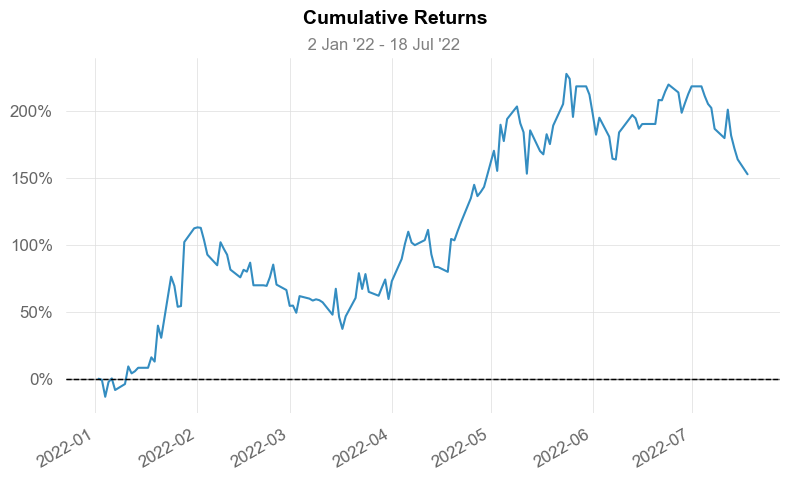

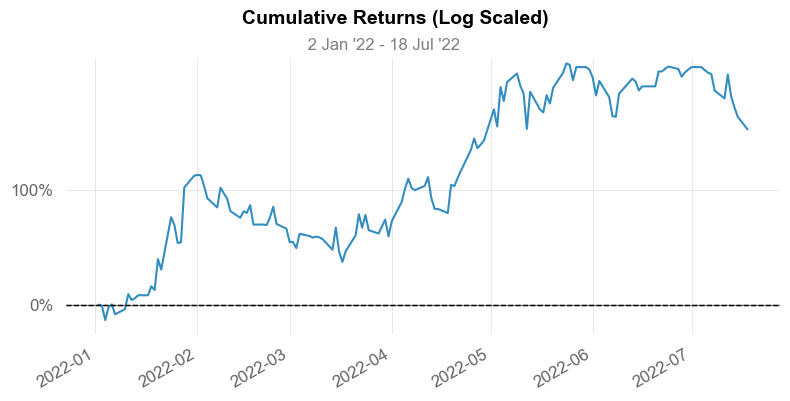

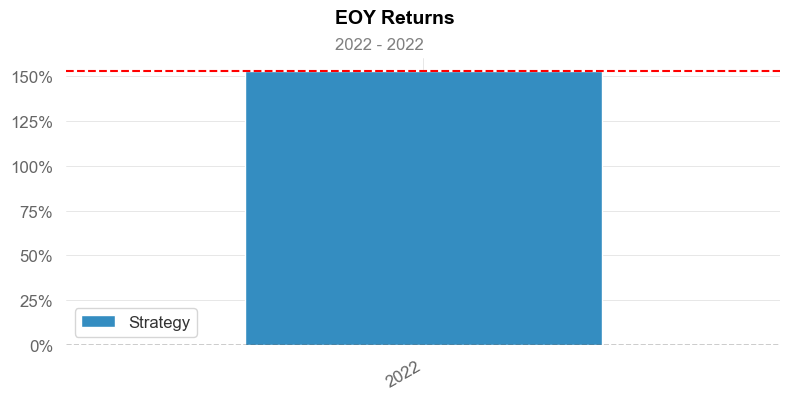

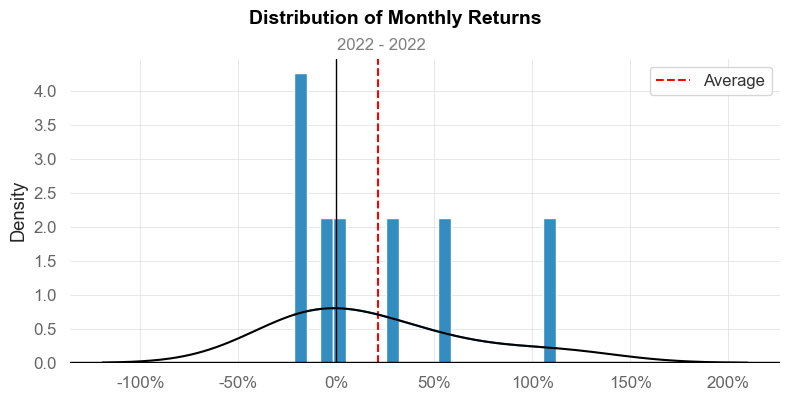

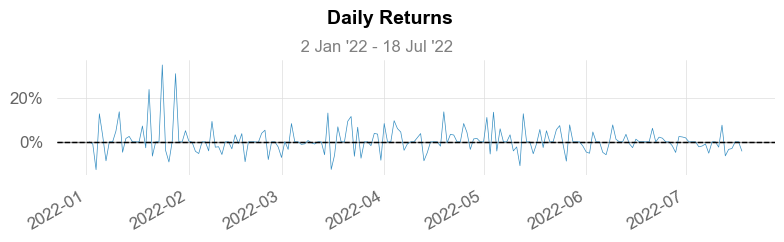

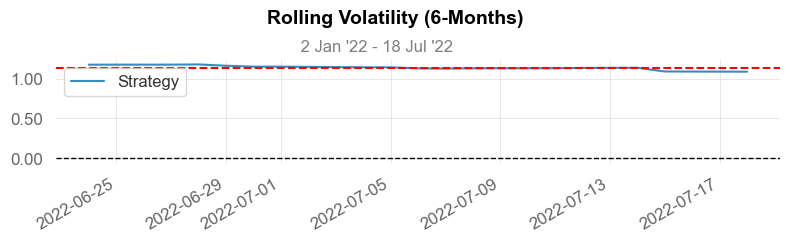

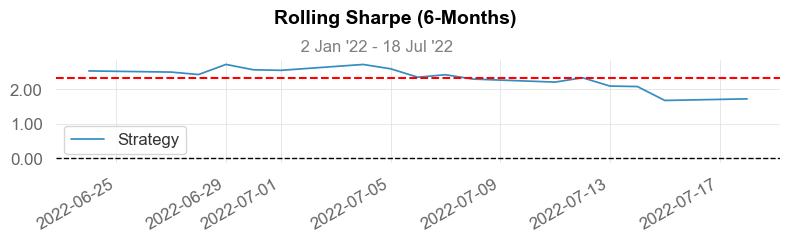

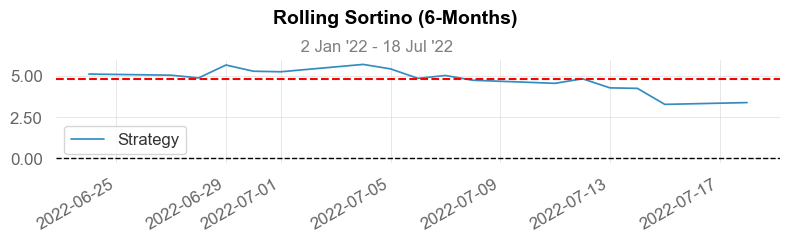

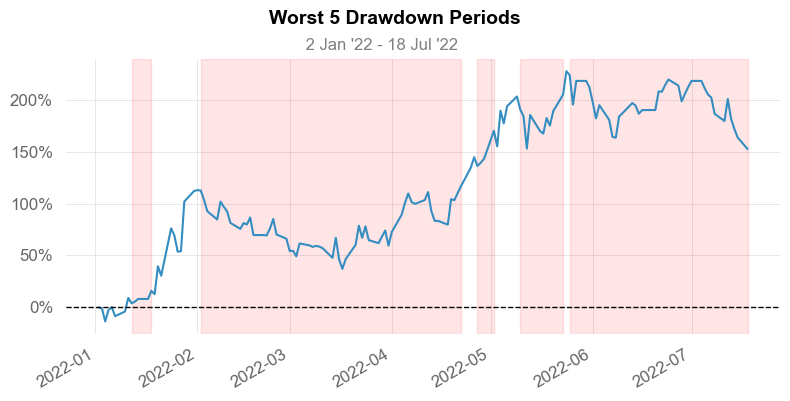

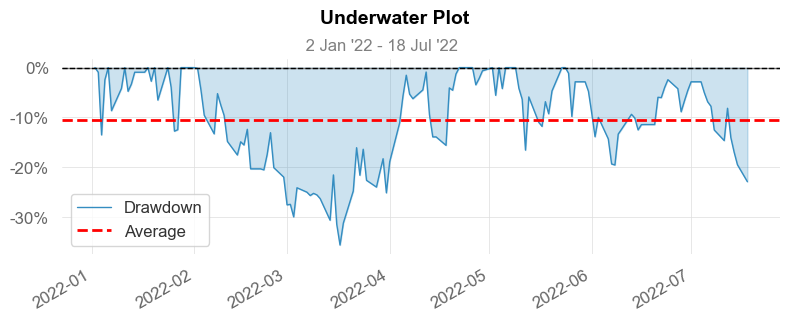

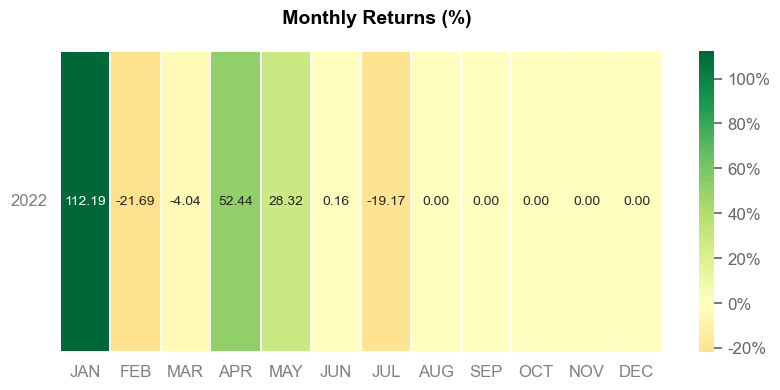

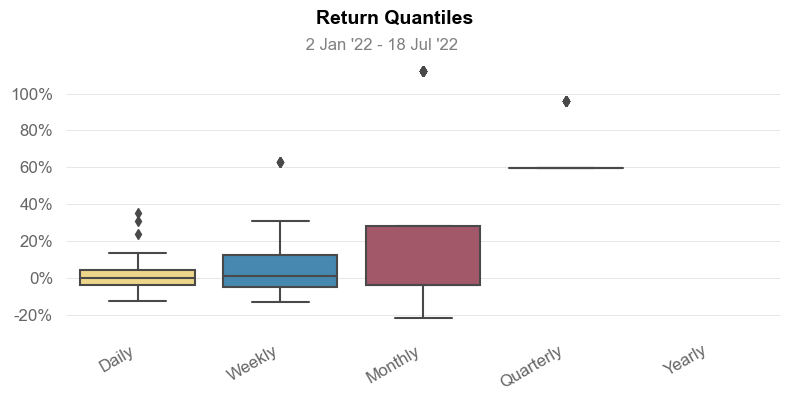

In [3]:
import quantstats
risk_free_rate = 0.02
returns = simulation.get_values().pct_change()
quantstats.reports.full(returns, rf=risk_free_rate)

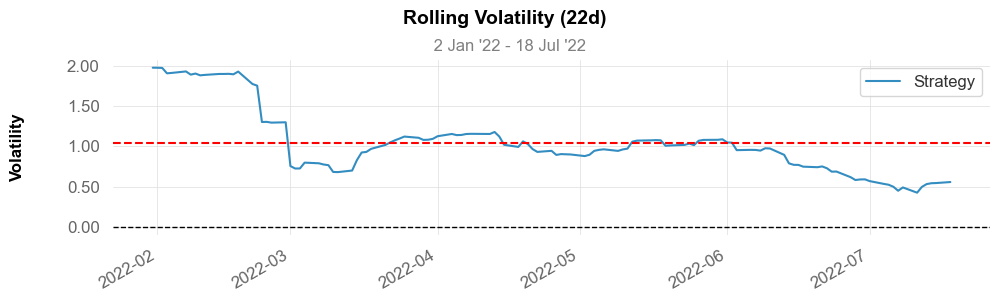

In [4]:
quantstats.plots.rolling_volatility(returns, period=22, period_label="22d")

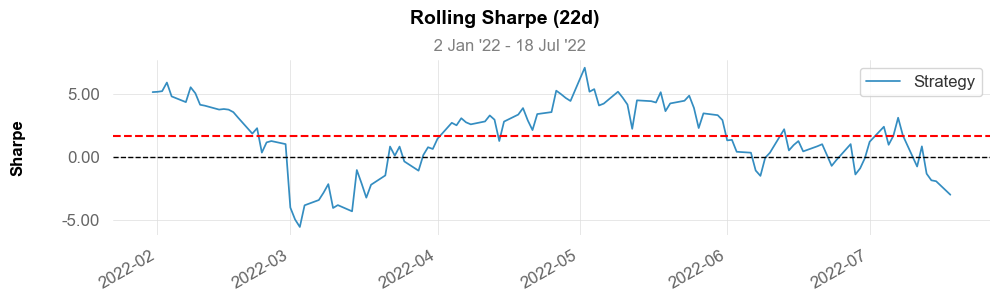

In [5]:
quantstats.plots.rolling_sharpe(returns, rf=risk_free_rate, period=22, period_label="22d")

In [6]:
quantstats.stats.drawdown_details(returns)

,start,valley,end,days,max drawdown,99% max drawdown
0,2022-01-02,2022-01-04,2022-01-17,15,-12.672979,-8.639309
1,2022-01-18,2022-01-26,2022-02-21,34,-9.168443,-9.048724
2,2022-02-22,2022-03-16,2022-04-15,52,-12.564767,-8.615385
3,2022-04-18,2022-05-12,2022-05-30,42,-10.879512,-8.780923
4,2022-05-31,2022-06-07,2022-06-20,20,-5.862690,-5.190395
5,2022-06-21,2022-06-28,2022-07-04,13,-4.832029,-1.851852
6,2022-07-05,2022-07-13,2022-07-18,13,-6.381958,-5.160057


In [7]:
quantstats.stats.outliers(returns)

2022-01-11    0.136739
2022-01-20    0.238004
2022-01-24    0.349364
2022-01-28    0.309780
2022-03-15    0.130859
2022-04-19    0.136491
2022-05-04    0.134936
dtype: float64

# What If: Remove Outliers

                           Strategy
-------------------------  ----------
Start Period               2022-01-03
End Period                 2022-07-18
Risk-Free Rate             2.0%
Time in Market             96.0%

Cumulative Return          -38.28%
CAGR﹪                     -59.29%

Sharpe                     -0.71
Smart Sharpe               -0.69
Sortino                    -1.0
Smart Sortino              -0.97
Sortino/√2                 -0.7
Smart Sortino/√2           -0.68
Omega                      0.89

Max Drawdown               -52.19%
Longest DD Days            180
Volatility (ann.)          83.06%
Calmar                     -1.14
Skew                       0.12
Kurtosis                   -0.31

Expected Daily %           -0.36%
Expected Monthly %         -6.66%
Expected Yearly %          -38.28%
Kelly Criterion            -5.04%
Risk of Ruin               0.0%
Daily Value-at-Risk        -8.83%
Expected Shortfall (cVaR)  -8.83%

Gain/Pain Ratio            -0.1
Gain/Pain (1M)  

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2022-01-19,2022-03-17,2022-07-18,180,-52.191176,-48.921767
2,2022-01-04,2022-01-04,2022-01-06,2,-12.672979,-1.529497
3,2022-01-07,2022-01-12,2022-01-18,11,-8.735714,-8.639309


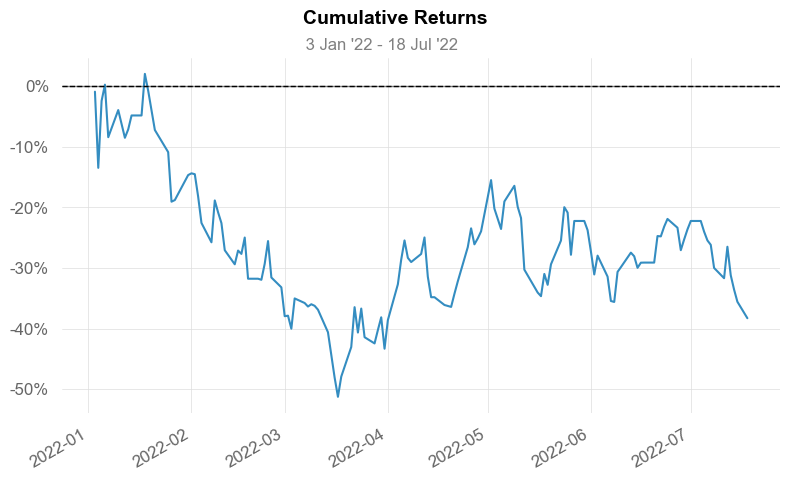

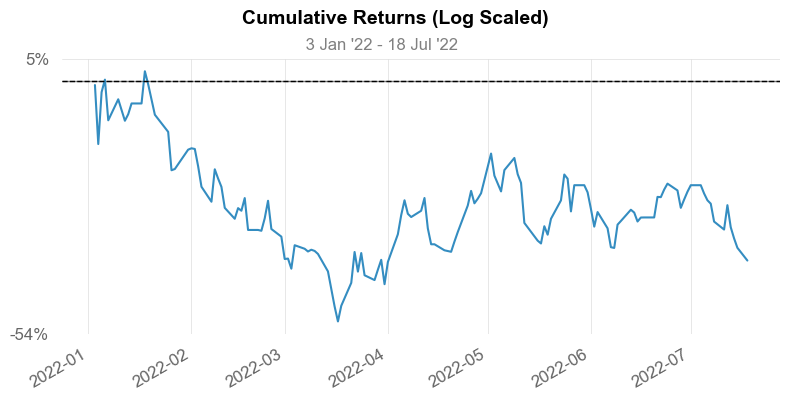

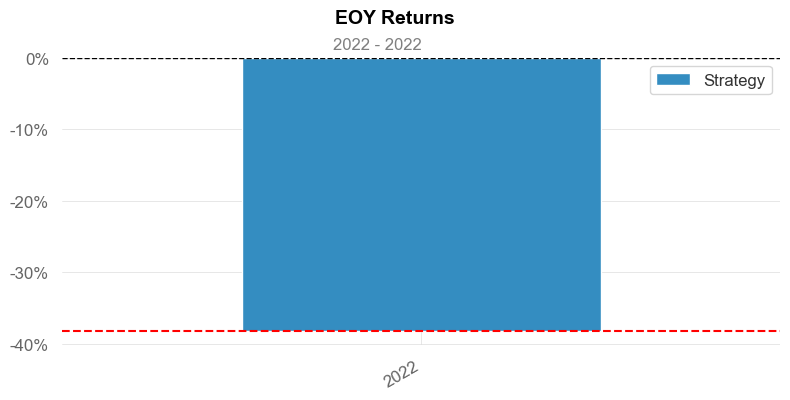

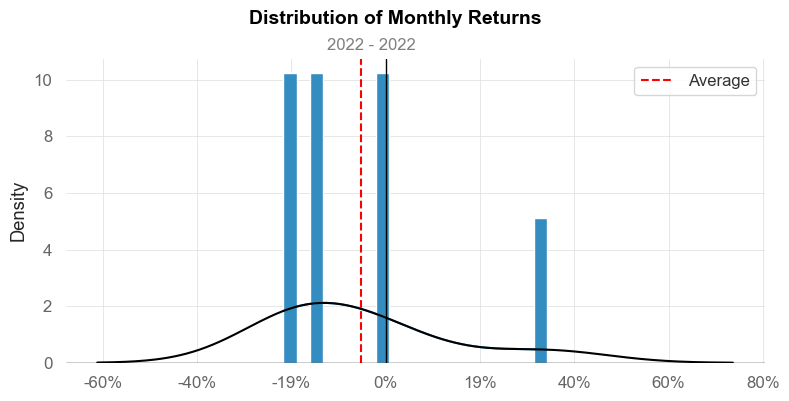

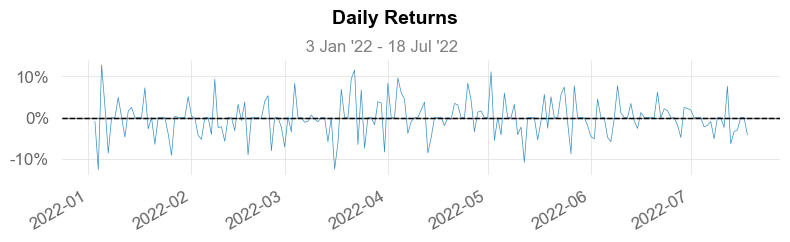

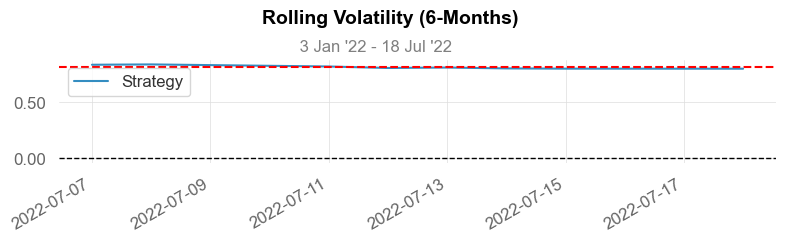

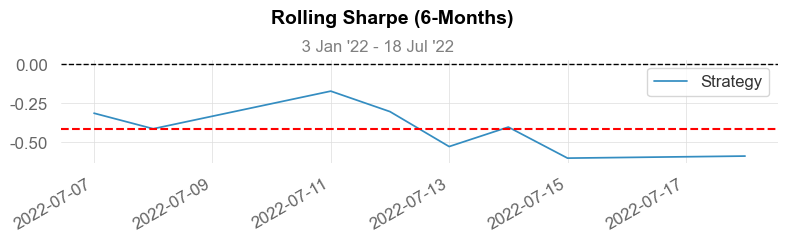

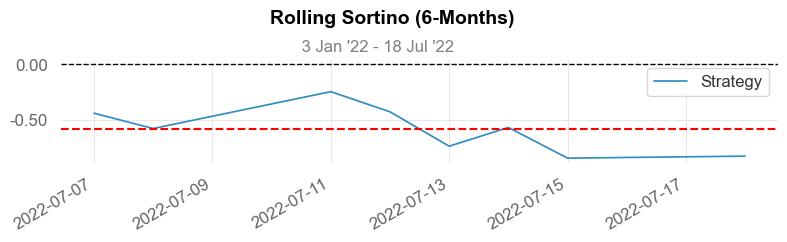

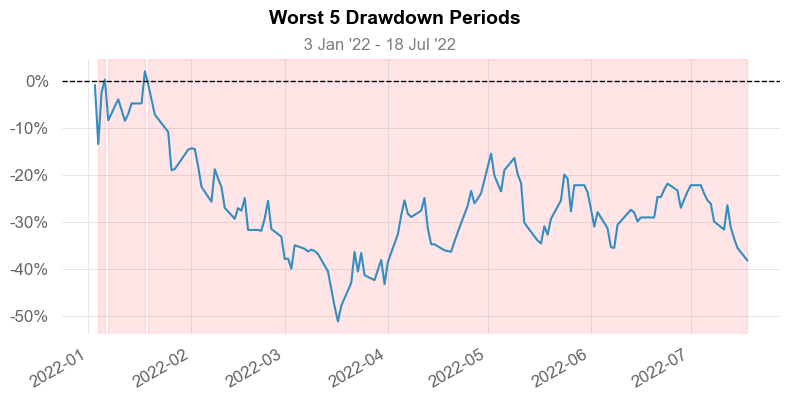

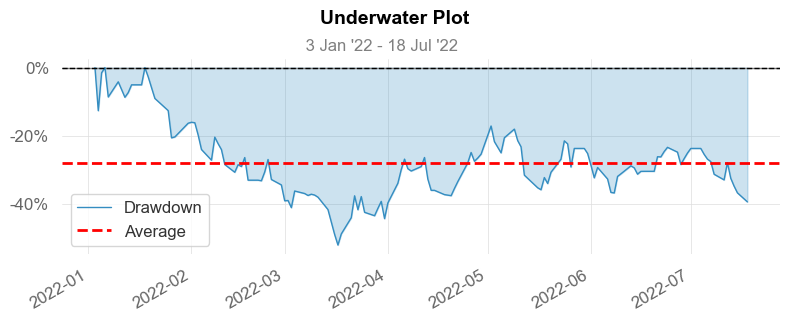

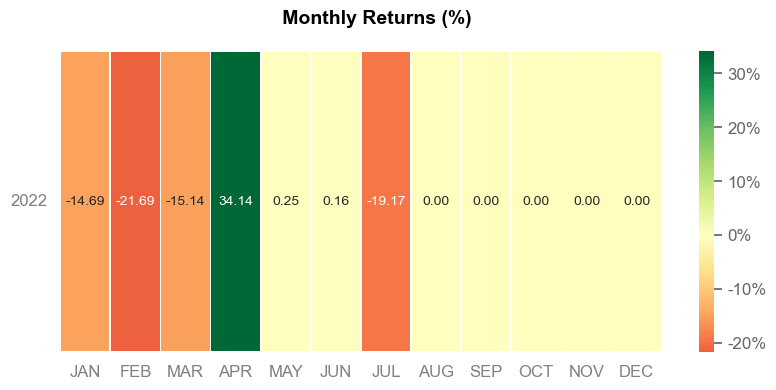

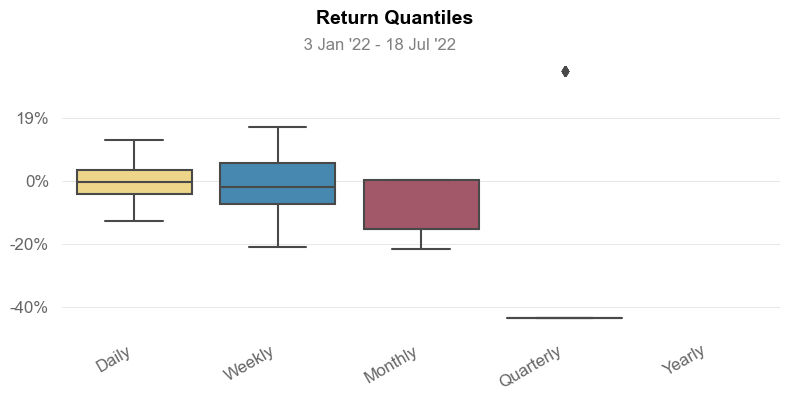

In [8]:
quantstats.reports.full(quantstats.stats.remove_outliers(returns), rf=risk_free_rate)